<a href="https://colab.research.google.com/github/alist2000/ANN_and_DL/blob/master/NNDL_HW1/Code/HW1_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, optimizers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Understanding Neural Networks with Fashion-MNIST
This notebook implements and analyzes neural networks using different hyperparameters and explores effect of each of them in confusion matrix,
result interpretation, and hyperparameter optimization.

In [2]:
def load_and_preprocess_data():
    """Load and preprocess Fashion-MNIST dataset"""
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

    # Normalize and reshape
    x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
    x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

    # Convert labels to categorical
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)
# Load data
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
class TrainingMonitor(tf.keras.callbacks.Callback):
    def __init__(self):
        super(TrainingMonitor, self).__init__()
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        self.train_losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.train_accuracies.append(logs.get('accuracy'))
        self.val_accuracies.append(logs.get('val_accuracy'))

def create_and_train_model(model_type, optimizer_name, learning_rate, x_train, y_train, x_test, y_test):
    """Create and train a model with specified configuration"""
    if model_type == 1:
        model = models.Sequential([
            layers.Input(shape=(28*28,)),
            layers.Dense(128, activation='relu'), layers.Dense(10, activation='softmax')
        ])
    elif model_type == 2:
        model = models.Sequential([
            layers.Input(shape=(28*28,)),
            layers.Dense(200, activation='relu',
                        kernel_regularizer=regularizers.l2(0.0001)),
            layers.Dropout(0.2), layers.Dense(10, activation='softmax')
        ])

    elif model_type == 3:
      model = models.Sequential([
          layers.Input(shape=(28*28,)),
          layers.Dense(300, activation='relu',
                      kernel_regularizer=regularizers.l2(0.0001)),
          layers.Dropout(0.2), layers.Dense(10, activation='softmax')
      ])

    elif model_type == 4:
      model = models.Sequential([
          layers.Input(shape=(28*28,)),
          layers.Dense(400, activation='relu',
                      kernel_regularizer=regularizers.l2(0.0001)),
          layers.Dropout(0.2), layers.Dense(10, activation='softmax')
      ])

    elif model_type == 5:
      model = models.Sequential([
          layers.Input(shape=(28*28,)),
          layers.Dense(80, activation='relu'), layers.Dense(10, activation='softmax')])

    elif model_type == 6:
      model = models.Sequential([
          layers.Input(shape=(28*28,)),
          layers.Dense(200, activation='relu'), layers.Dense(10, activation='softmax')])

    elif model_type == 7:
      model = models.Sequential([
          layers.Input(shape=(28*28,)),
          layers.Dense(300, activation='relu'), layers.Dense(10, activation='softmax')])
    elif model_type == 8:
        # Two hidden layers with balanced architecture
        model = models.Sequential([
            layers.Input(shape=(28*28,)),
            layers.Dense(128, activation='relu'),
            layers.Dense(62, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])

    elif model_type == 9:
        # Two hidden layers with wider first layer
        model = models.Sequential([
            layers.Input(shape=(28*28,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])

    elif model_type == 10:
        # Three hidden layers with gradual reduction
        model = models.Sequential([
            layers.Input(shape=(28*28,)),
            layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
            layers.BatchNormalization(),
            layers.Dense(10, activation='softmax')
        ])

    elif model_type == 11:
        # Three hidden layers with wider architecture
        model = models.Sequential([
            layers.Input(shape=(28*28,)),
            layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
            layers.BatchNormalization(),
            layers.Dropout(0.4),
            layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
            layers.BatchNormalization(),
            layers.Dense(10, activation='softmax')
        ])



    # Create optimizer
    if optimizer_name == 'Adam':
        opt = optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'RMSprop':
        opt = optimizers.RMSprop(learning_rate=learning_rate)
    else:  # Nadam
        opt = optimizers.Nadam(learning_rate=learning_rate)
    monitor = TrainingMonitor()
    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(
        x_train, y_train,
        epochs=10, batch_size=32, validation_data=(x_test, y_test), callbacks=[monitor], verbose=1)

    return model, history, monitor

### Testing Learning Rate

In this section, I will test the effect of the learning rate on the model. Based on the previous part of this project, I am using **Nadam** as the optimizer, and I will adjust the learning rate to observe its impact as a hyperparameter.

**Model Specifications**:
- Model: **model1**
- Neurons: **128**
- No dropout layer


In [4]:
# Define configurations
configs1 = [
    (1, 'Nadam', 0.0001),
    (1, 'Nadam', 0.001),
    (1, 'Nadam', 0.01)
]

results1 = []
for model_type, opt_name, lr in configs1:
    print(f"\nTraining Model {model_type} with {opt_name} and learning rate: {lr}")
    model, history, monitor = create_and_train_model(
        model_type, opt_name, lr, x_train, y_train, x_test, y_test
    )

    # Evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    results1.append({
        'Model': f'Model {model_type}',
        'Optimizer': opt_name,
        'Learning Rate': lr,
        'Test Accuracy': test_acc,
        'History': history,
        'Monitor': monitor
    })


Training Model 1 with Nadam and learning rate: 0.0001
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6813 - loss: 1.0058 - val_accuracy: 0.8197 - val_loss: 0.5346
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8315 - loss: 0.4969 - val_accuracy: 0.8365 - val_loss: 0.4794
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8511 - loss: 0.4372 - val_accuracy: 0.8470 - val_loss: 0.4490
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8577 - loss: 0.4092 - val_accuracy: 0.8483 - val_loss: 0.4293
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8650 - loss: 0.3868 - val_accuracy: 0.8499 - val_loss: 0.4280
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8701 - loss: 0.3771 - val_accuracy: 0.8578 - val_loss: 0.4076
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8740 - loss: 0.3616 - val_accuracy: 0.8597 - val_loss: 0.4037
Epoch 8/10
1875/1875 ━━━━━━━━━━━

In [ ]:
   # Define configurations
configs2 = [
    (1, 'Nadam', 0.001),
    (2, 'Nadam', 0.001),
    (3, 'Nadam', 0.001),
    (4, 'Nadam', 0.001),
    (5, 'Nadam', 0.001),
    (6, 'Nadam', 0.001),
    (7, 'Nadam', 0.001)
]

# Train models and collect results
results2 = []
for model_type, opt_name, lr in configs2:
    print(f"\nTraining Model {model_type} with {opt_name} and learning rate: {lr}")
    model, history, monitor = create_and_train_model(
        model_type, opt_name, lr, x_train, y_train, x_test, y_test
    )

    # Evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    results2.append({
        'Model': f'Model {model_type}',
        'Optimizer': opt_name,
        'Learning Rate': lr,
        'Test Accuracy': test_acc,
        'History': history,
        'Monitor': monitor
    })


Training Model 1 with Nadam and learning rate: 0.001
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7912 - loss: 0.6113 - val_accuracy: 0.8513 - val_loss: 0.4208
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8657 - loss: 0.3821 - val_accuracy: 0.8556 - val_loss: 0.3942
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8809 - loss: 0.3318 - val_accuracy: 0.8665 - val_loss: 0.3758
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8870 - loss: 0.3086 - val_accuracy: 0.8640 - val_loss: 0.3748
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8937 - loss: 0.2901 - val_accuracy: 0.8739 - val_loss: 0.3529
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8983 - loss: 0.2800 - val_accuracy: 0.8732 - val_loss: 0.3471
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9005 - loss: 0.2670 - val_accuracy: 0.8765 - val_loss: 0.3425
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━

In [ ]:
   # Define configurations
configs3 = [
    (8, 'Nadam', 0.001),
    (9, 'Nadam', 0.001),
    (10, 'Nadam', 0.001),
    (11, 'Nadam', 0.001)
]

# Train models and collect results
results3 = []
for model_type, opt_name, lr in configs3:
    print(f"\nTraining Model {model_type} with {opt_name} and learning rate: {lr}")
    model, history, monitor = create_and_train_model(
        model_type, opt_name, lr, x_train, y_train, x_test, y_test
    )

    # Evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    results3.append({
        'Model': f'Model {model_type}',
        'Optimizer': opt_name,
        'Learning Rate': lr,
        'Test Accuracy': test_acc,
        'History': history,
        'Monitor': monitor
    })

In [5]:
def plot_training_metrics(results):
    """Plot comprehensive training metrics"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    # Plot training accuracy
    for result in results:
        label = f"{result['Model']} - {result['Optimizer']} - lr: {result['Learning Rate']}"
        axes[0, 0].plot(result['Monitor'].train_accuracies, label=label)
    axes[0, 0].set_title('Training Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    # Plot training loss
    for result in results:
        label = f"{result['Model']} - {result['Optimizer']} - lr: {result['Learning Rate']}"
        axes[0, 1].plot(result['Monitor'].train_losses, label=label)
    axes[0, 1].set_title('Training Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    # Plot validation accuracy
    for result in results:
        label = f"{result['Model']} - {result['Optimizer']} - lr: {result['Learning Rate']}"
        axes[1, 0].plot(result['Monitor'].val_accuracies, label=label)
    axes[1, 0].set_title('Validation Accuracy')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Accuracy')
    axes[1, 0].legend()
    # Plot validation loss
    for result in results:
        label = f"{result['Model']} - {result['Optimizer']} - lr: {result['Learning Rate']}"
        axes[1, 1].plot(result['Monitor'].val_losses, label=label)
    axes[1, 1].set_title('Validation Loss')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Loss')
    axes[1, 1].legend()
    plt.tight_layout()
    plt.show()

In [6]:
def plot_confusion_matrix(model, x_test, y_test):
    """Plot confusion matrix for model predictions"""
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_test_classes, y_pred_classes)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()
    return cm

In [7]:
def most_confused_class(classes_number, conf_matrix):
  # Corrected logic to find the most confused classes
  for i in range(classes_number):
      conf_row = conf_matrix[i].copy()  # Copy the row to avoid changing the original matrix
      conf_row[i] = -1  # Set diagonal element to -1 to ignore it (so we can find the second-largest)
      most_confused_class_ = conf_row.argmax()  # Now find the argmax, ignoring diagonal
      print(f"Class {i} is most often ({conf_matrix[i][most_confused_class_]} times)"
       f"confused with Class {most_confused_class_}.")

  print("\n")

  # Identify the two classes most confused with each other
  max_confusion = 0
  confused_pair = (0, 0)
  for i in range(10):
      for j in range(10):
          if i != j and conf_matrix[i][j] + conf_matrix[j][i] > max_confusion:
              max_confusion = conf_matrix[i][j] + conf_matrix[j][i]
              confused_pair = (i, j)

  print(f"The two classes most confused with each other are: {confused_pair}")
  print(f"The two classes most confused with each : {max_confusion} times.")

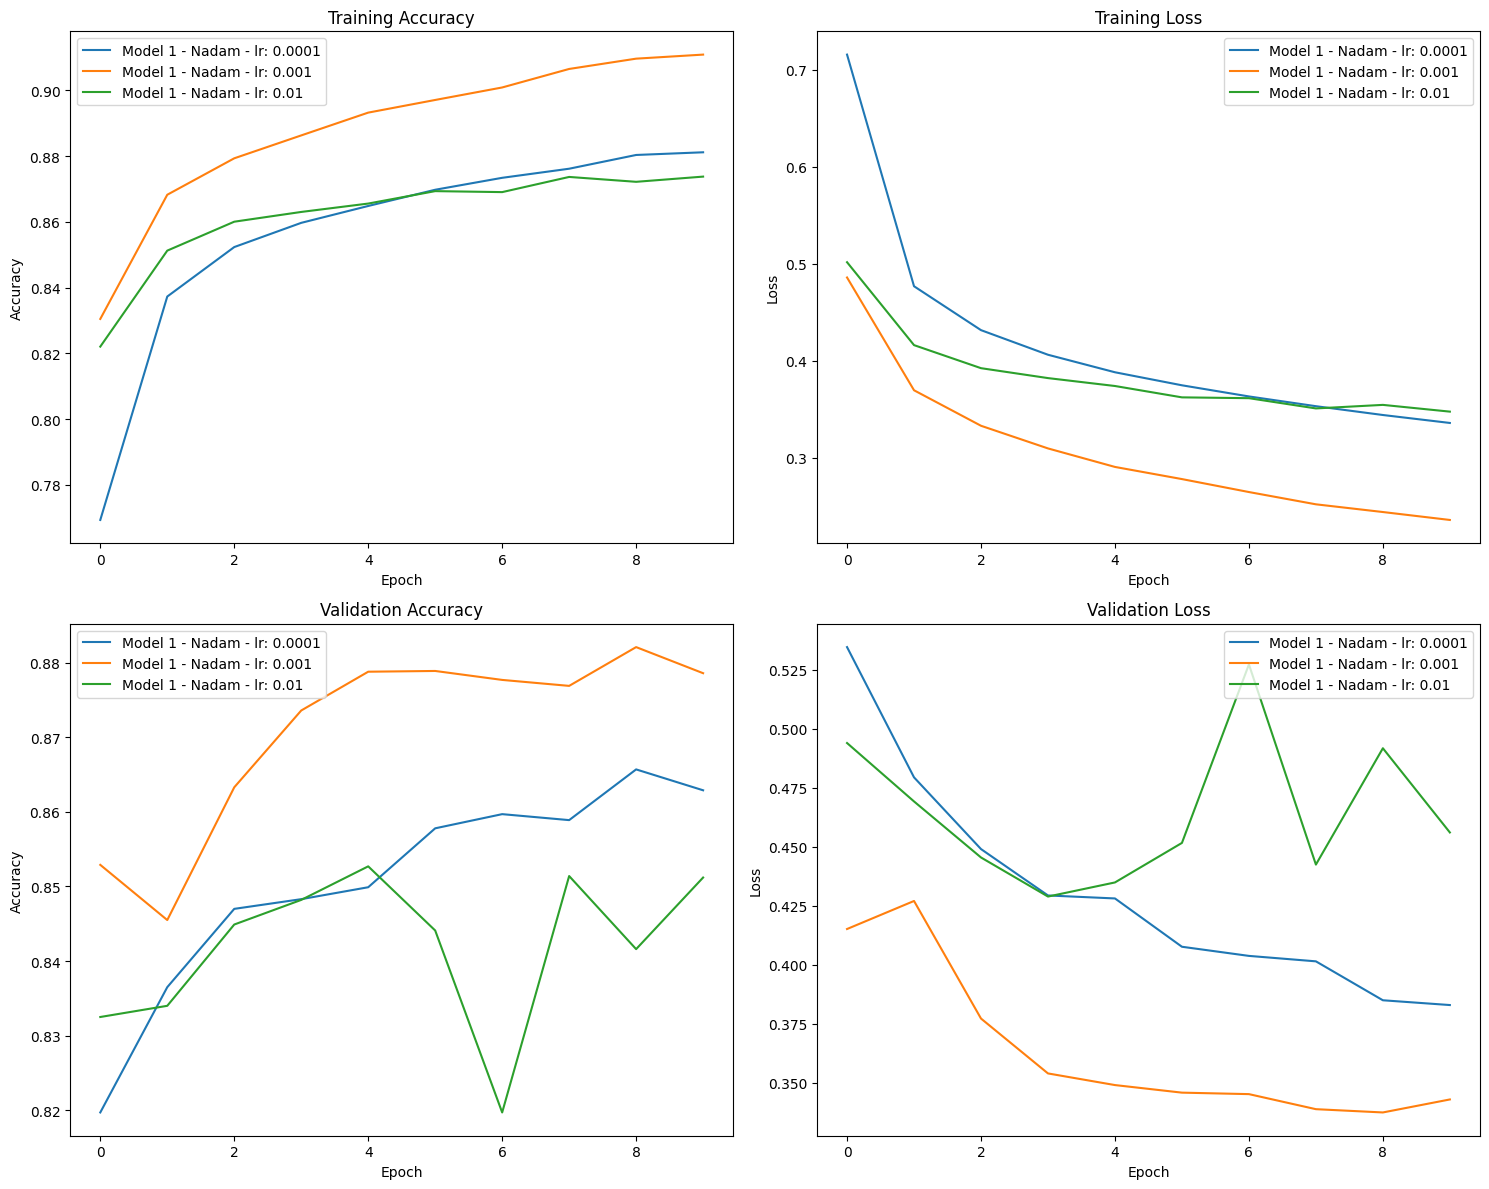

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


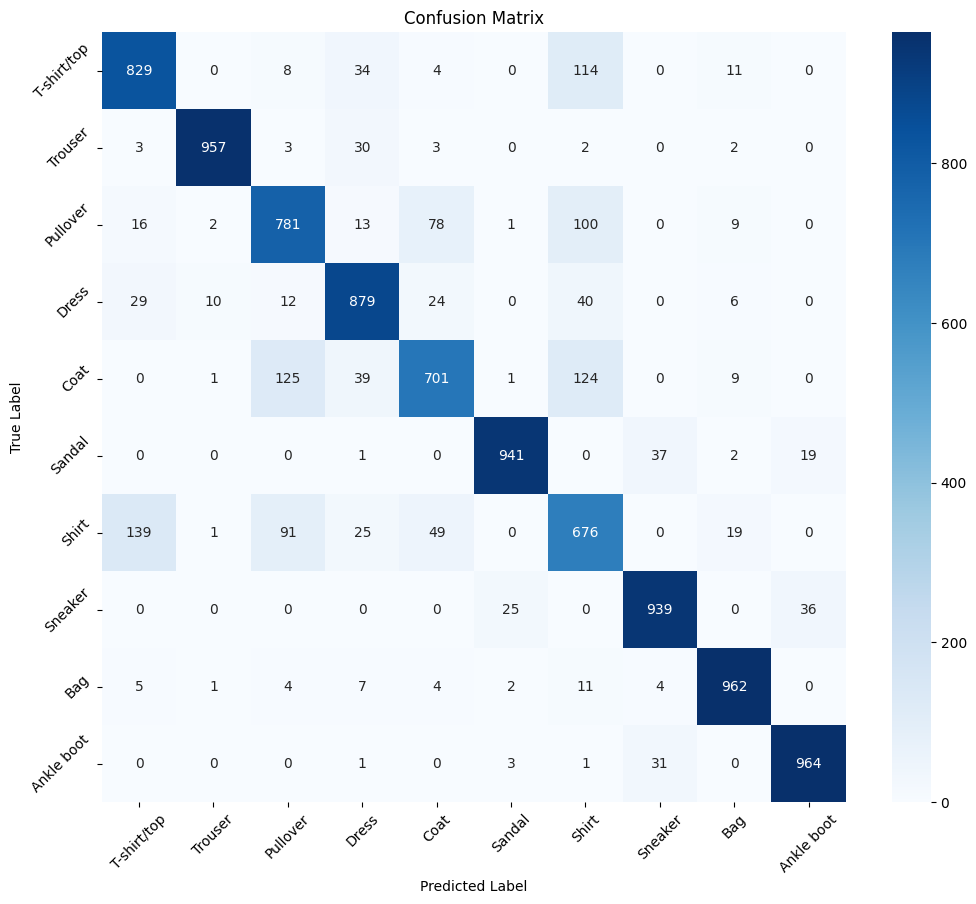

Class 0 is most often (114 times)confused with Class 6.
Class 1 is most often (30 times)confused with Class 3.
Class 2 is most often (100 times)confused with Class 6.
Class 3 is most often (40 times)confused with Class 6.
Class 4 is most often (125 times)confused with Class 2.
Class 5 is most often (37 times)confused with Class 7.
Class 6 is most often (139 times)confused with Class 0.
Class 7 is most often (36 times)confused with Class 9.
Class 8 is most often (11 times)confused with Class 6.
Class 9 is most often (31 times)confused with Class 7.


The two classes most confused with each other are: (0, 6)
The two classes most confused with each : 253 times.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


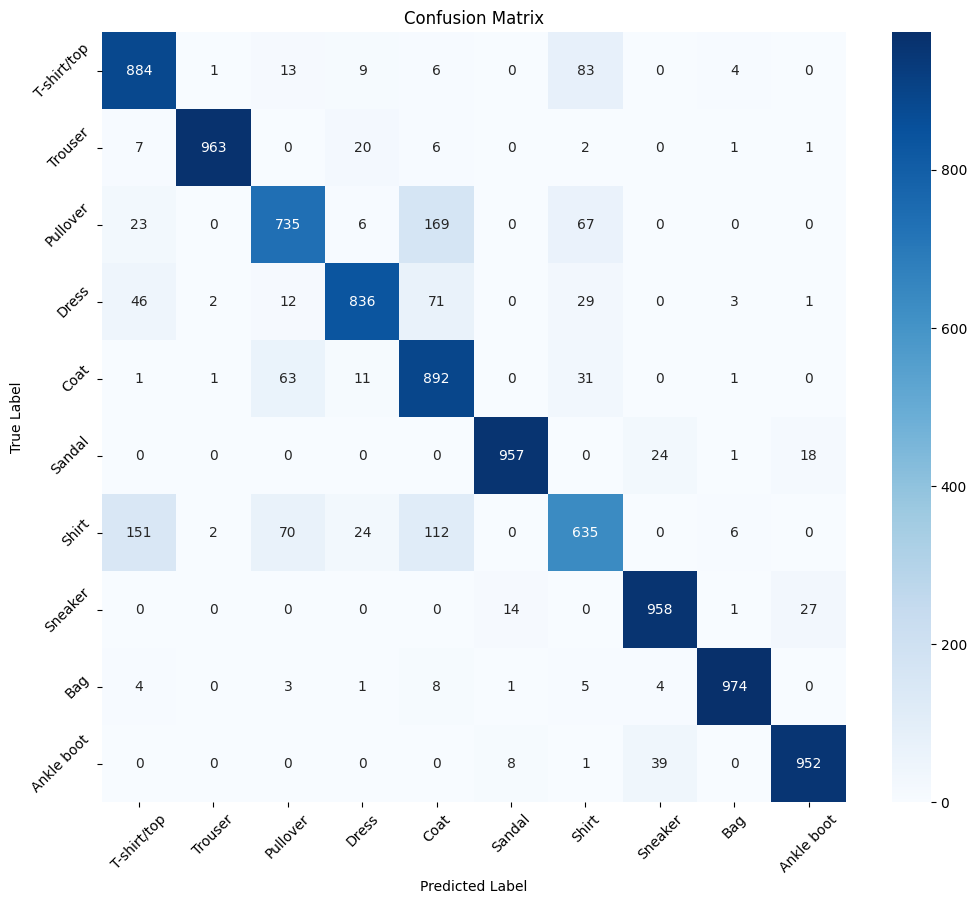

Class 0 is most often (83 times)confused with Class 6.
Class 1 is most often (20 times)confused with Class 3.
Class 2 is most often (169 times)confused with Class 4.
Class 3 is most often (71 times)confused with Class 4.
Class 4 is most often (63 times)confused with Class 2.
Class 5 is most often (24 times)confused with Class 7.
Class 6 is most often (151 times)confused with Class 0.
Class 7 is most often (27 times)confused with Class 9.
Class 8 is most often (8 times)confused with Class 4.
Class 9 is most often (39 times)confused with Class 7.


The two classes most confused with each other are: (0, 6)
The two classes most confused with each : 234 times.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


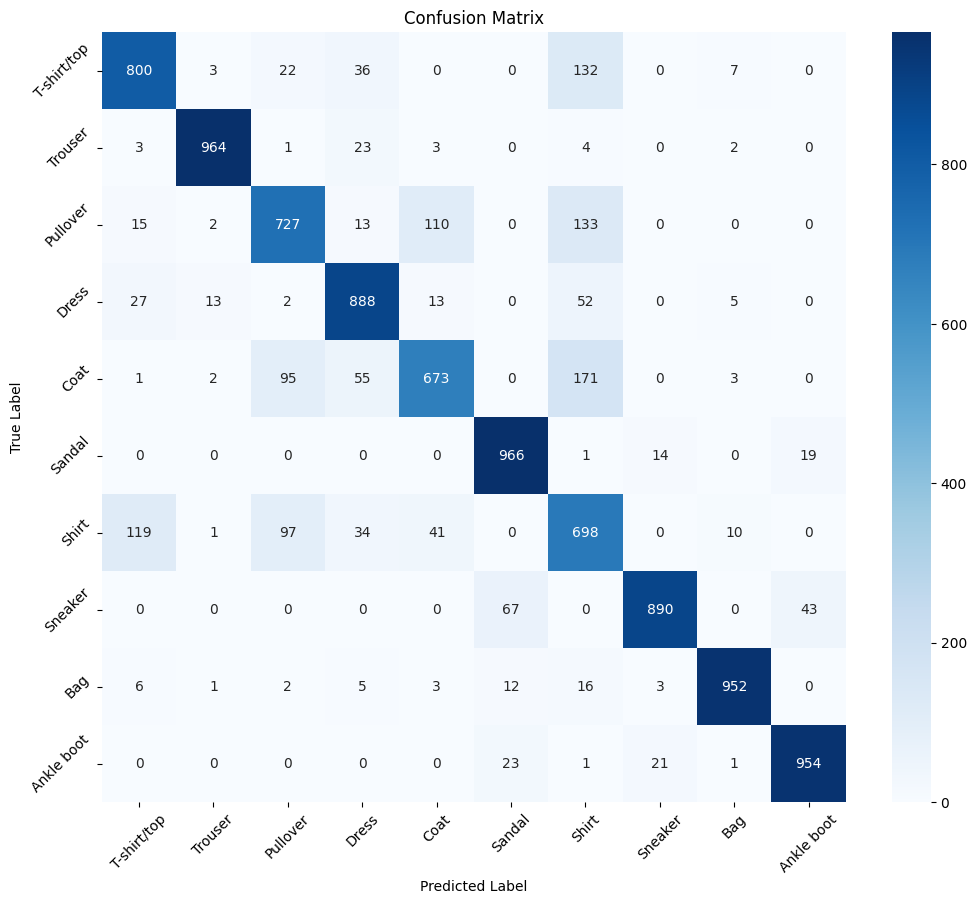

Class 0 is most often (132 times)confused with Class 6.
Class 1 is most often (23 times)confused with Class 3.
Class 2 is most often (133 times)confused with Class 6.
Class 3 is most often (52 times)confused with Class 6.
Class 4 is most often (171 times)confused with Class 6.
Class 5 is most often (19 times)confused with Class 9.
Class 6 is most often (119 times)confused with Class 0.
Class 7 is most often (67 times)confused with Class 5.
Class 8 is most often (16 times)confused with Class 6.
Class 9 is most often (23 times)confused with Class 5.


The two classes most confused with each other are: (0, 6)
The two classes most confused with each : 251 times.


In [8]:
# Plot training metrics
plot_training_metrics(results1)

for res in results1:
    cm = plot_confusion_matrix(res['History'].model, x_test, y_test)
    most_confused_class(10, cm)

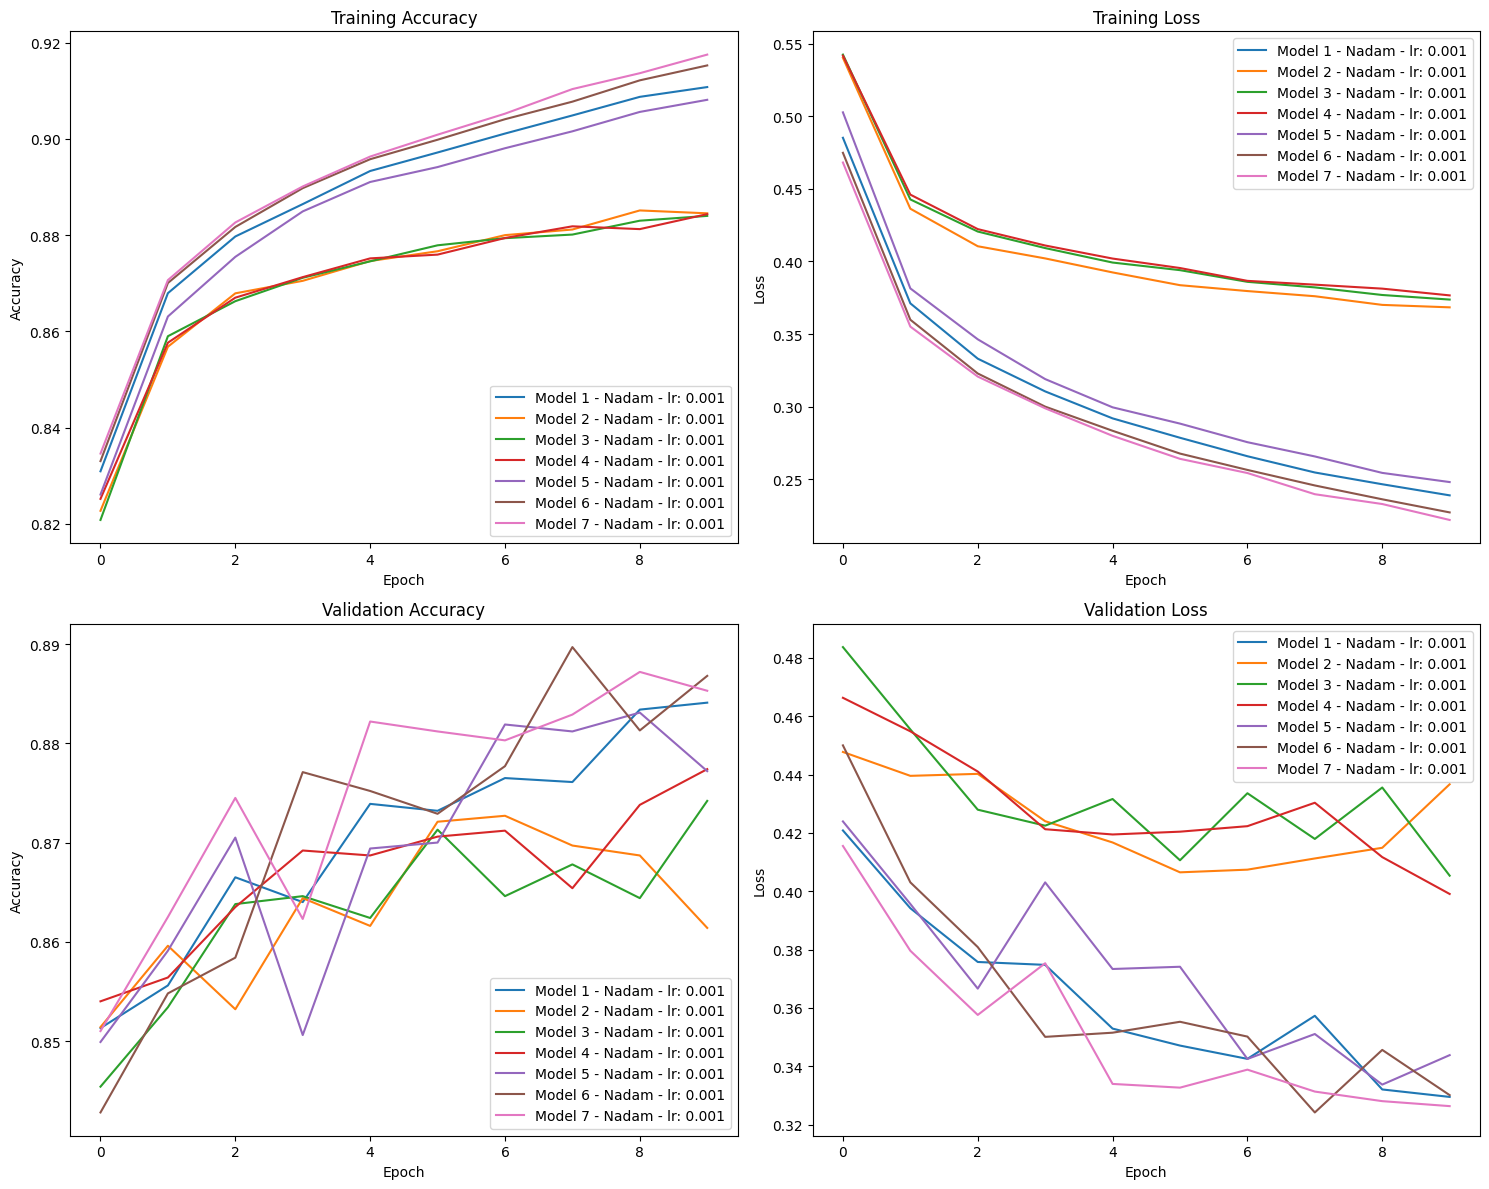

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


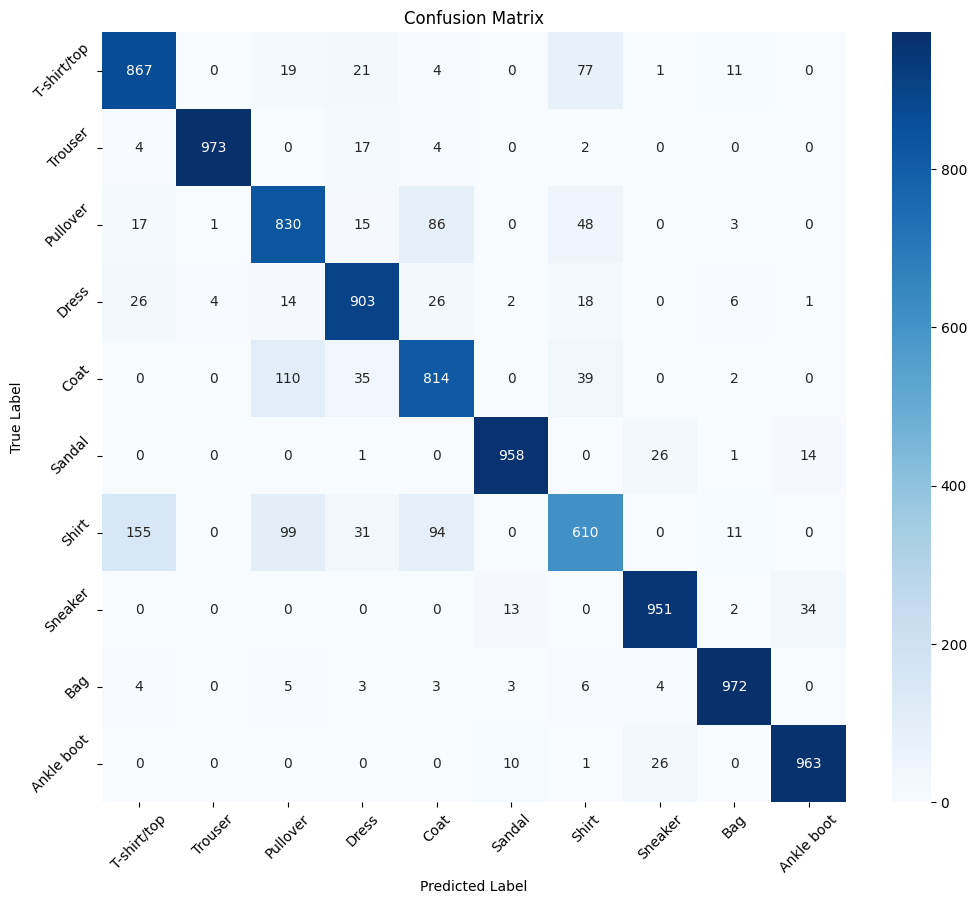

Class 0 is most often (77 times)confused with Class 6.
Class 1 is most often (17 times)confused with Class 3.
Class 2 is most often (86 times)confused with Class 4.
Class 3 is most often (26 times)confused with Class 0.
Class 4 is most often (110 times)confused with Class 2.
Class 5 is most often (26 times)confused with Class 7.
Class 6 is most often (155 times)confused with Class 0.
Class 7 is most often (34 times)confused with Class 9.
Class 8 is most often (6 times)confused with Class 6.
Class 9 is most often (26 times)confused with Class 7.


The two classes most confused with each other are: (0, 6)
The two classes most confused with each : 232 times.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


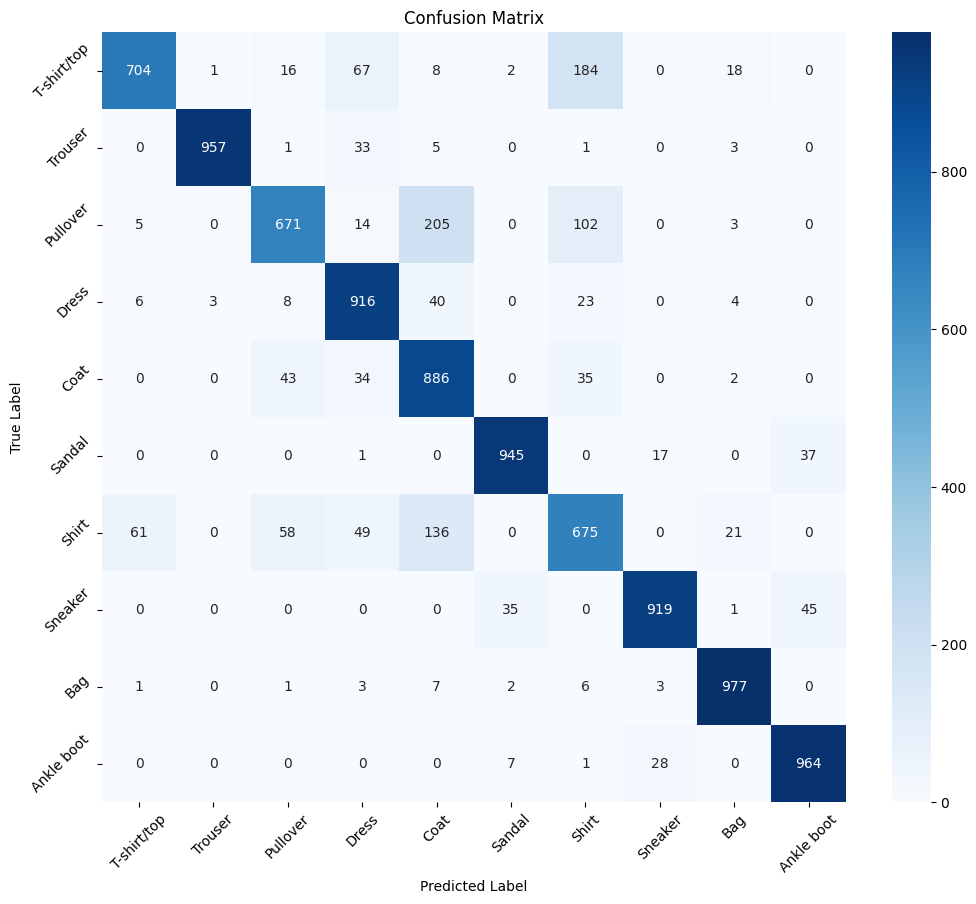

Class 0 is most often (184 times)confused with Class 6.
Class 1 is most often (33 times)confused with Class 3.
Class 2 is most often (205 times)confused with Class 4.
Class 3 is most often (40 times)confused with Class 4.
Class 4 is most often (43 times)confused with Class 2.
Class 5 is most often (37 times)confused with Class 9.
Class 6 is most often (136 times)confused with Class 4.
Class 7 is most often (45 times)confused with Class 9.
Class 8 is most often (7 times)confused with Class 4.
Class 9 is most often (28 times)confused with Class 7.


The two classes most confused with each other are: (2, 4)
The two classes most confused with each : 248 times.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


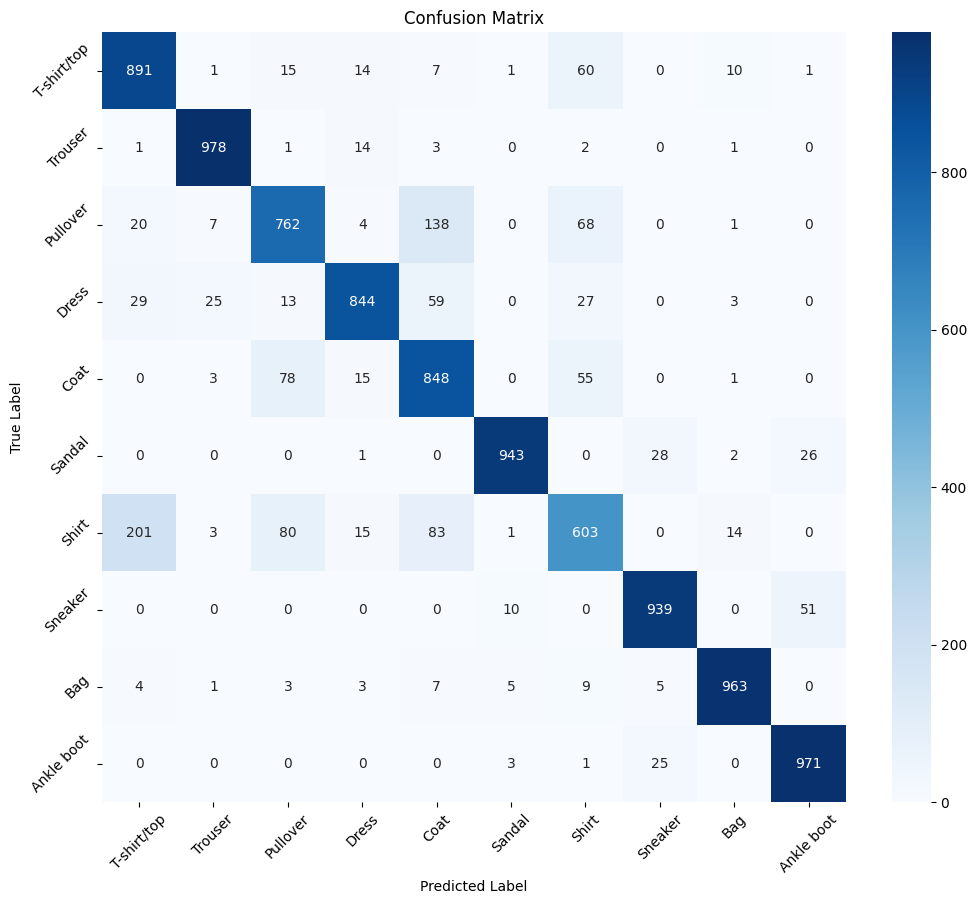

Class 0 is most often (60 times)confused with Class 6.
Class 1 is most often (14 times)confused with Class 3.
Class 2 is most often (138 times)confused with Class 4.
Class 3 is most often (59 times)confused with Class 4.
Class 4 is most often (78 times)confused with Class 2.
Class 5 is most often (28 times)confused with Class 7.
Class 6 is most often (201 times)confused with Class 0.
Class 7 is most often (51 times)confused with Class 9.
Class 8 is most often (9 times)confused with Class 6.
Class 9 is most often (25 times)confused with Class 7.


The two classes most confused with each other are: (0, 6)
The two classes most confused with each : 261 times.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


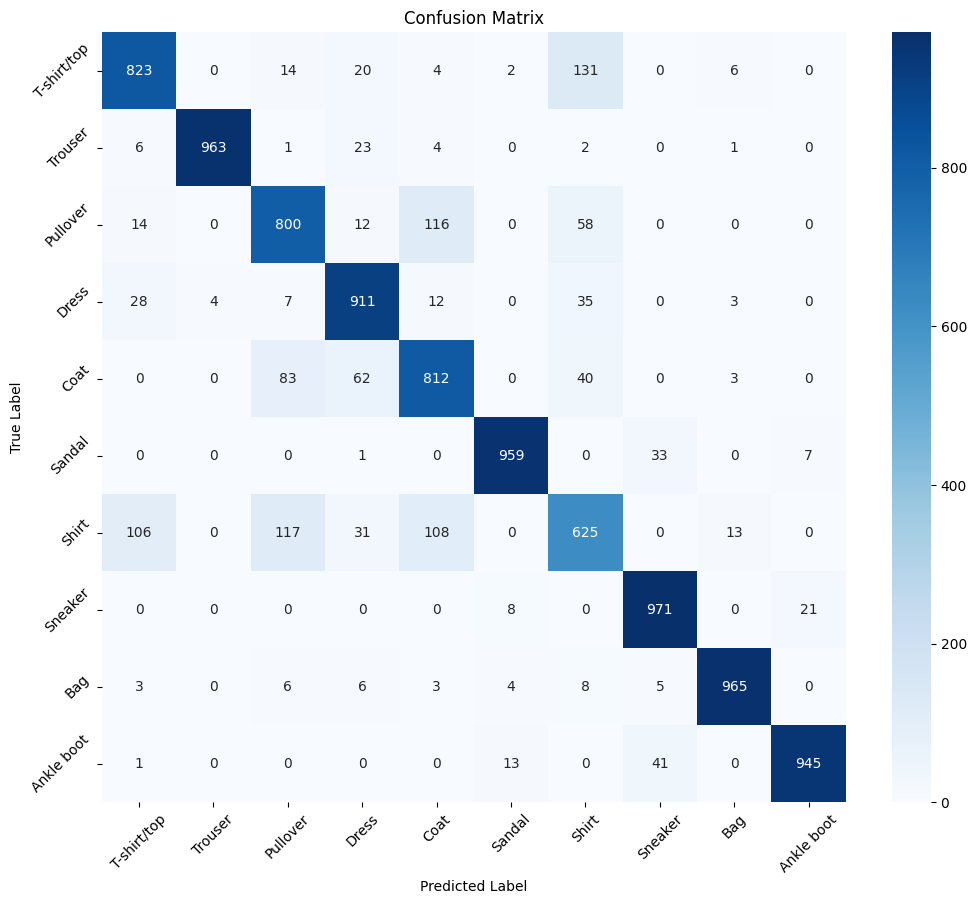

Class 0 is most often (131 times)confused with Class 6.
Class 1 is most often (23 times)confused with Class 3.
Class 2 is most often (116 times)confused with Class 4.
Class 3 is most often (35 times)confused with Class 6.
Class 4 is most often (83 times)confused with Class 2.
Class 5 is most often (33 times)confused with Class 7.
Class 6 is most often (117 times)confused with Class 2.
Class 7 is most often (21 times)confused with Class 9.
Class 8 is most often (8 times)confused with Class 6.
Class 9 is most often (41 times)confused with Class 7.


The two classes most confused with each other are: (0, 6)
The two classes most confused with each : 237 times.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


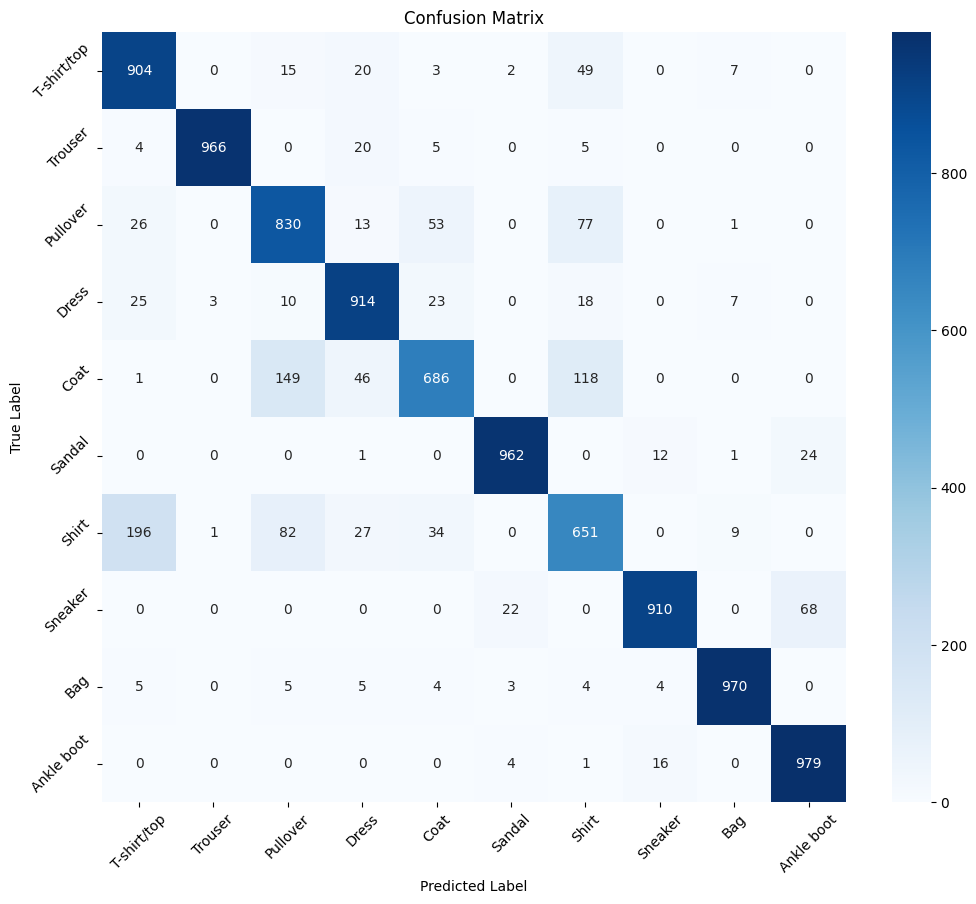

Class 0 is most often (49 times)confused with Class 6.
Class 1 is most often (20 times)confused with Class 3.
Class 2 is most often (77 times)confused with Class 6.
Class 3 is most often (25 times)confused with Class 0.
Class 4 is most often (149 times)confused with Class 2.
Class 5 is most often (24 times)confused with Class 9.
Class 6 is most often (196 times)confused with Class 0.
Class 7 is most often (68 times)confused with Class 9.
Class 8 is most often (5 times)confused with Class 0.
Class 9 is most often (16 times)confused with Class 7.


The two classes most confused with each other are: (0, 6)
The two classes most confused with each : 245 times.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


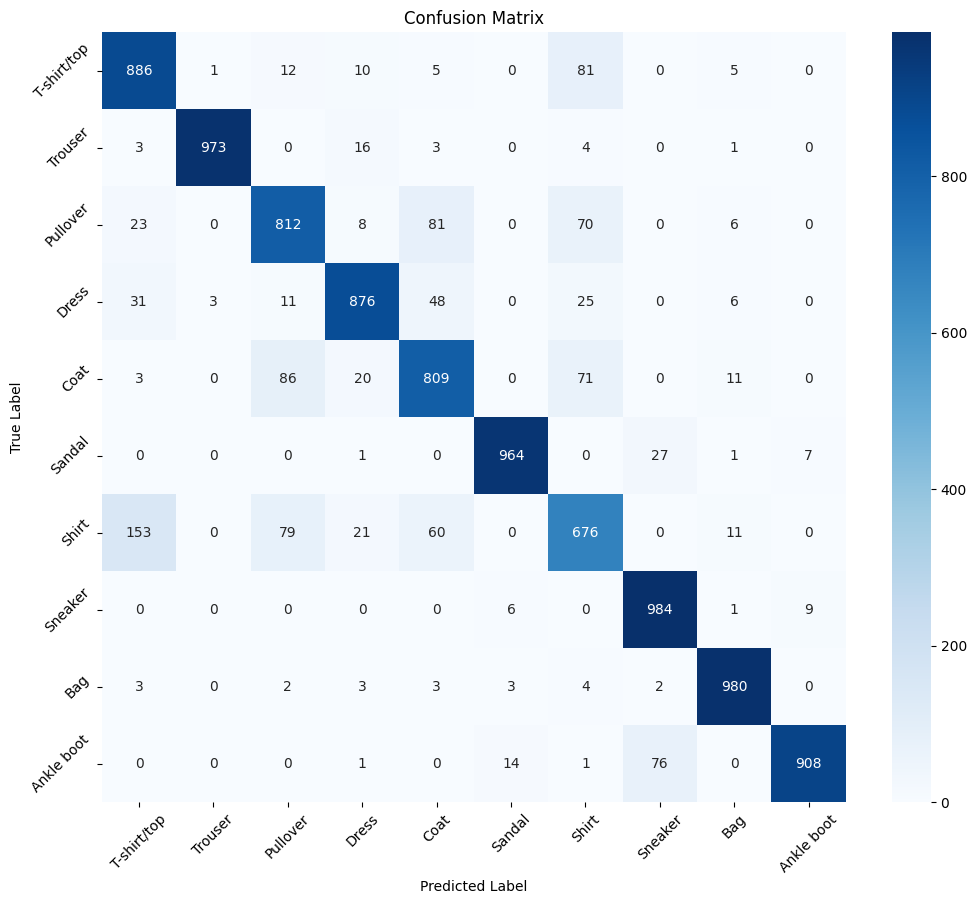

Class 0 is most often (81 times)confused with Class 6.
Class 1 is most often (16 times)confused with Class 3.
Class 2 is most often (81 times)confused with Class 4.
Class 3 is most often (48 times)confused with Class 4.
Class 4 is most often (86 times)confused with Class 2.
Class 5 is most often (27 times)confused with Class 7.
Class 6 is most often (153 times)confused with Class 0.
Class 7 is most often (9 times)confused with Class 9.
Class 8 is most often (4 times)confused with Class 6.
Class 9 is most often (76 times)confused with Class 7.


The two classes most confused with each other are: (0, 6)
The two classes most confused with each : 234 times.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


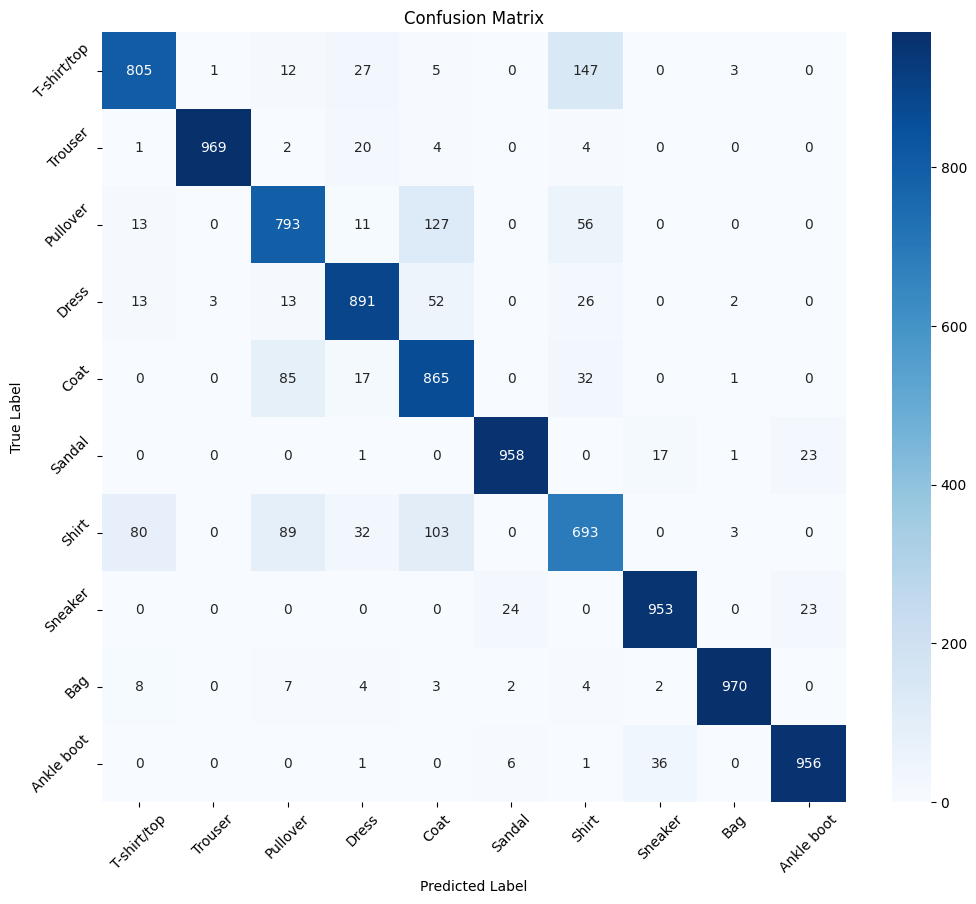

Class 0 is most often (147 times)confused with Class 6.
Class 1 is most often (20 times)confused with Class 3.
Class 2 is most often (127 times)confused with Class 4.
Class 3 is most often (52 times)confused with Class 4.
Class 4 is most often (85 times)confused with Class 2.
Class 5 is most often (23 times)confused with Class 9.
Class 6 is most often (103 times)confused with Class 4.
Class 7 is most often (24 times)confused with Class 5.
Class 8 is most often (8 times)confused with Class 0.
Class 9 is most often (36 times)confused with Class 7.


The two classes most confused with each other are: (0, 6)
The two classes most confused with each : 227 times.


In [ ]:
# Plot training metrics
plot_training_metrics(results2)

for res in results2:
    cm = plot_confusion_matrix(res['History'].model, x_test, y_test)
    most_confused_class(10, cm)

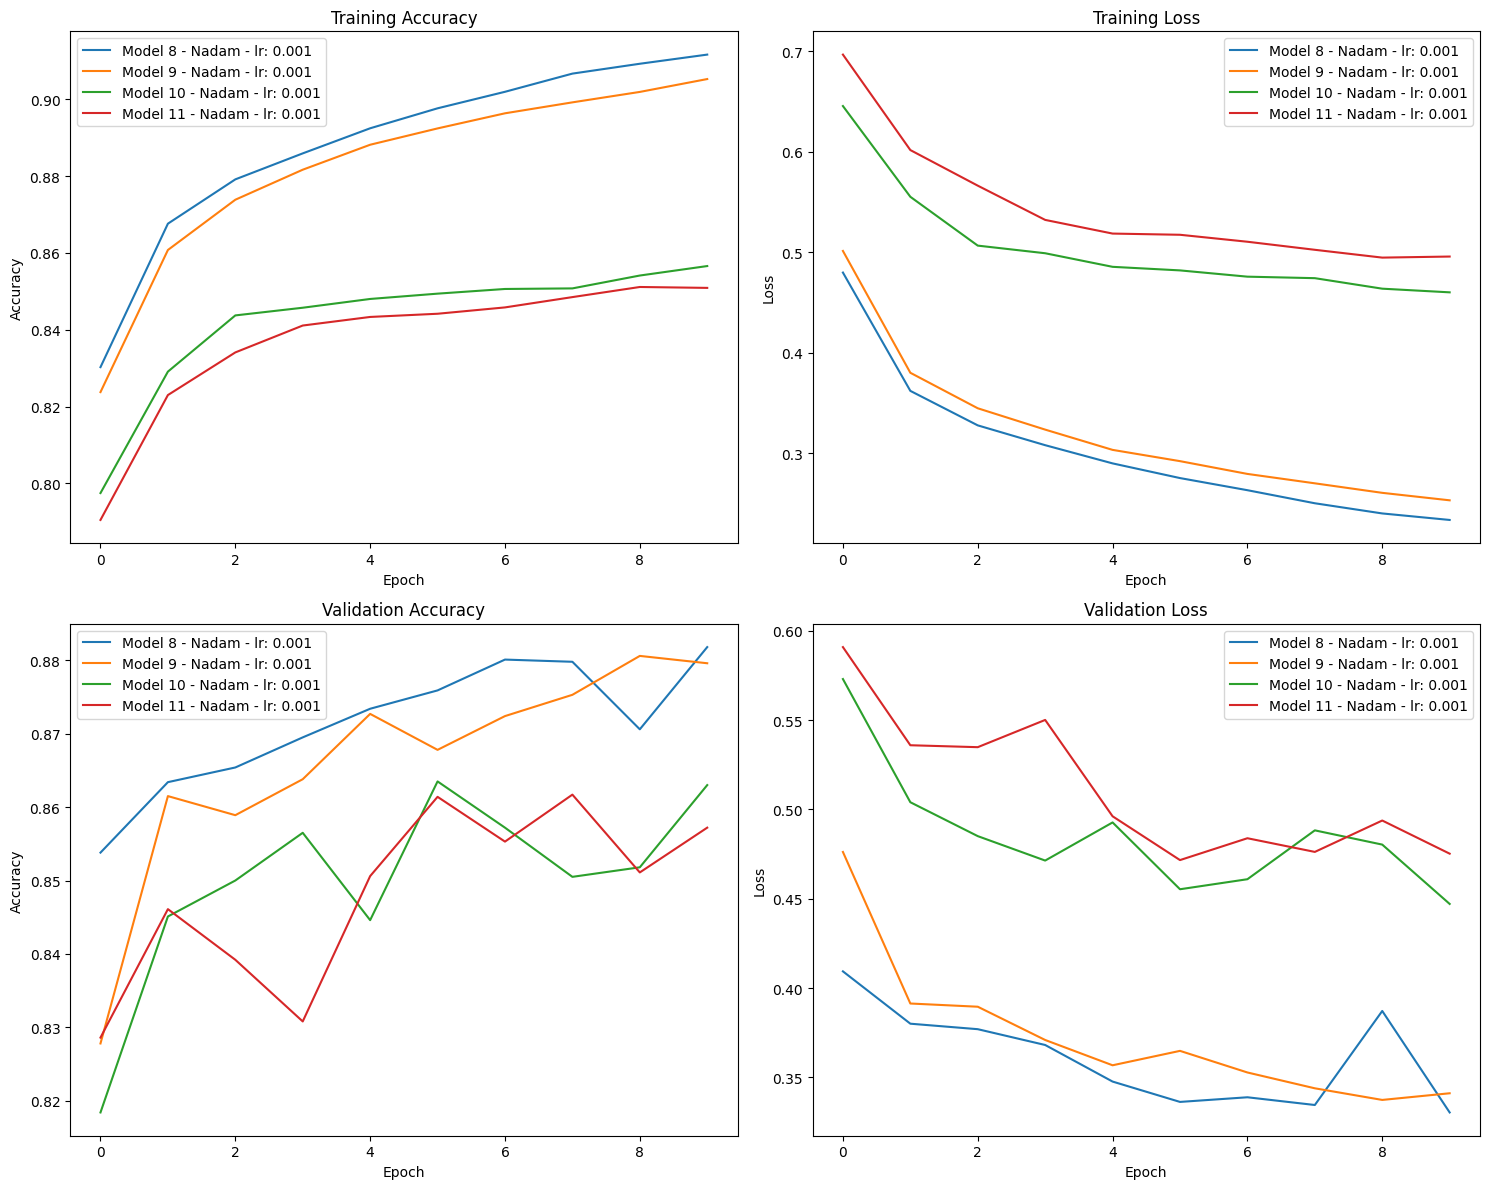

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


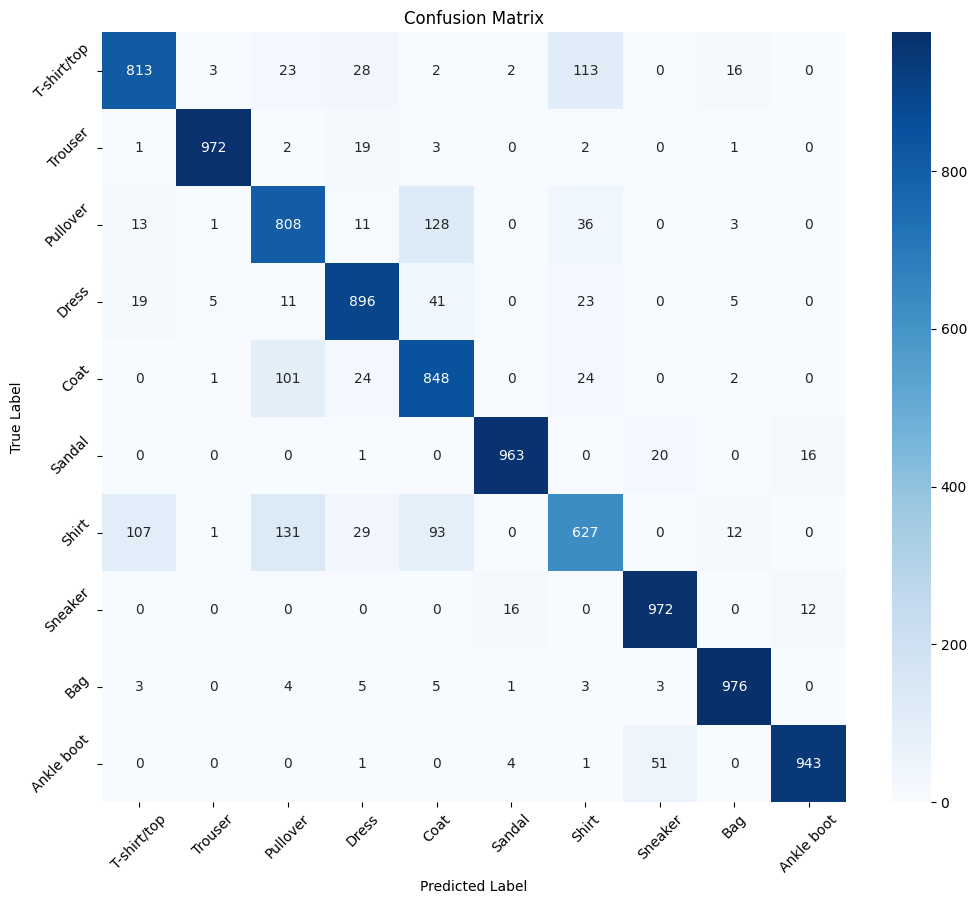

Class 0 is most often (113 times)confused with Class 6.
Class 1 is most often (19 times)confused with Class 3.
Class 2 is most often (128 times)confused with Class 4.
Class 3 is most often (41 times)confused with Class 4.
Class 4 is most often (101 times)confused with Class 2.
Class 5 is most often (20 times)confused with Class 7.
Class 6 is most often (131 times)confused with Class 2.
Class 7 is most often (16 times)confused with Class 5.
Class 8 is most often (5 times)confused with Class 3.
Class 9 is most often (51 times)confused with Class 7.


The two classes most confused with each other are: (2, 4)
The two classes most confused with each : 229 times.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


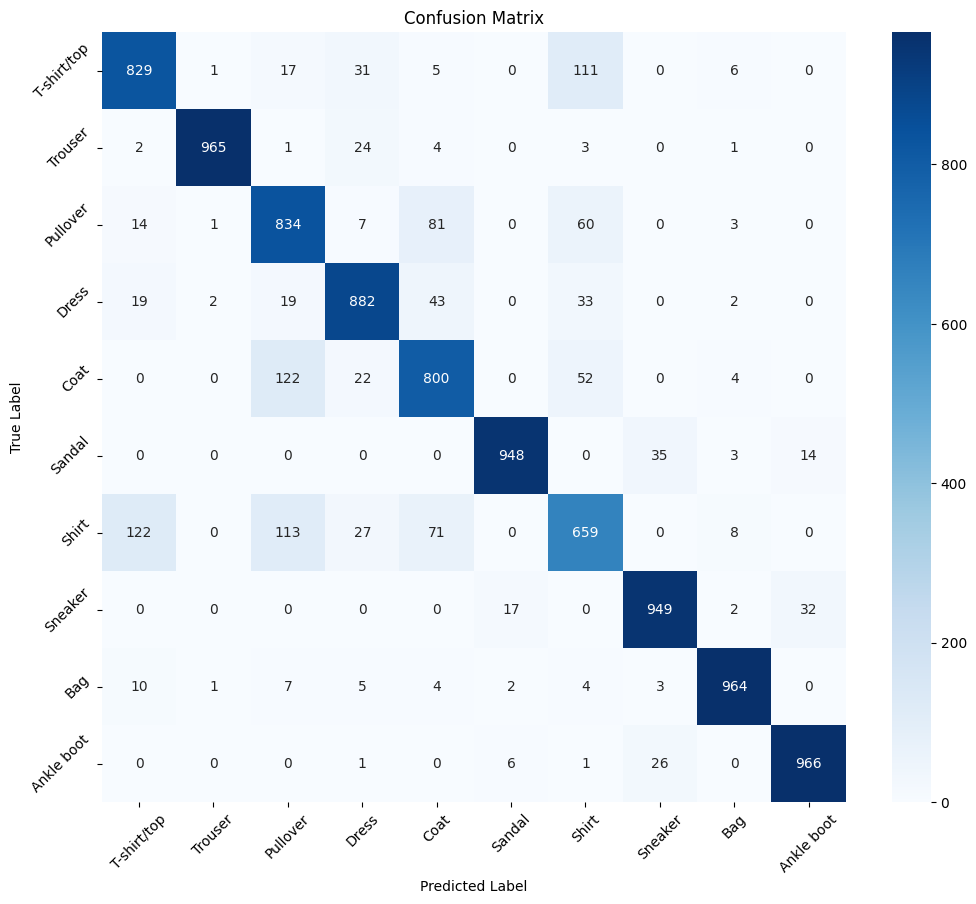

Class 0 is most often (111 times)confused with Class 6.
Class 1 is most often (24 times)confused with Class 3.
Class 2 is most often (81 times)confused with Class 4.
Class 3 is most often (43 times)confused with Class 4.
Class 4 is most often (122 times)confused with Class 2.
Class 5 is most often (35 times)confused with Class 7.
Class 6 is most often (122 times)confused with Class 0.
Class 7 is most often (32 times)confused with Class 9.
Class 8 is most often (10 times)confused with Class 0.
Class 9 is most often (26 times)confused with Class 7.


The two classes most confused with each other are: (0, 6)
The two classes most confused with each : 233 times.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


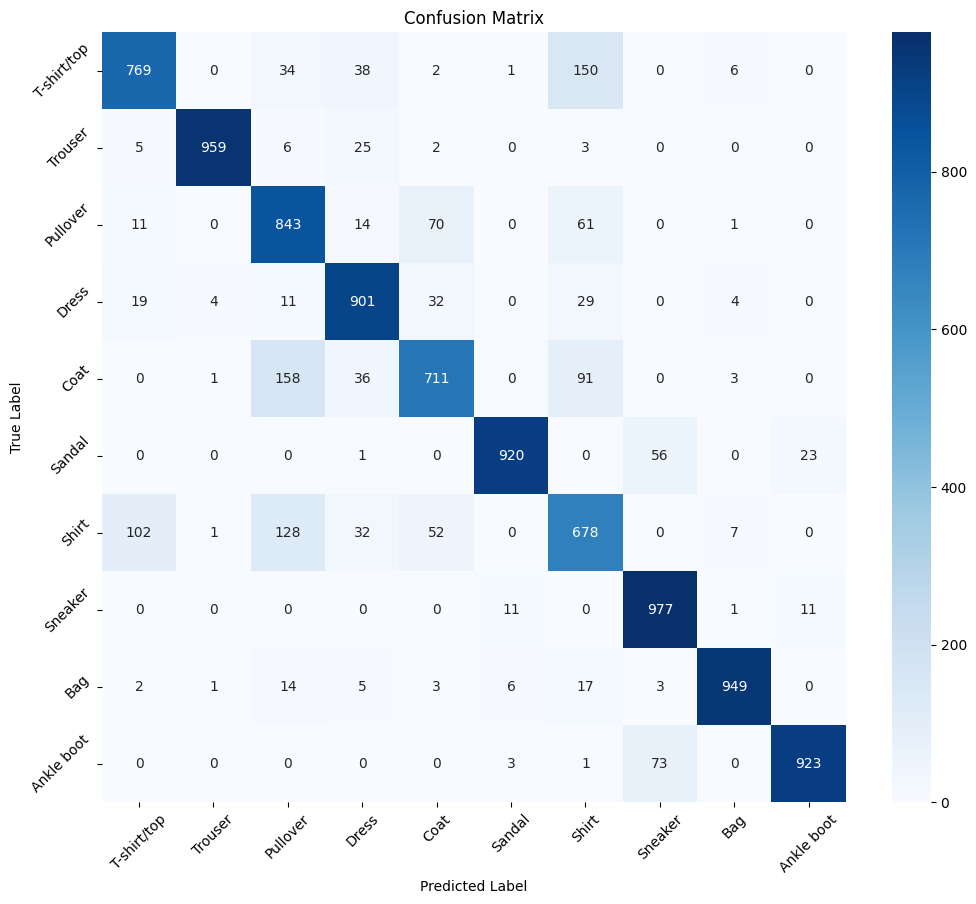

Class 0 is most often (150 times)confused with Class 6.
Class 1 is most often (25 times)confused with Class 3.
Class 2 is most often (70 times)confused with Class 4.
Class 3 is most often (32 times)confused with Class 4.
Class 4 is most often (158 times)confused with Class 2.
Class 5 is most often (56 times)confused with Class 7.
Class 6 is most often (128 times)confused with Class 2.
Class 7 is most often (11 times)confused with Class 5.
Class 8 is most often (17 times)confused with Class 6.
Class 9 is most often (73 times)confused with Class 7.


The two classes most confused with each other are: (0, 6)
The two classes most confused with each : 252 times.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


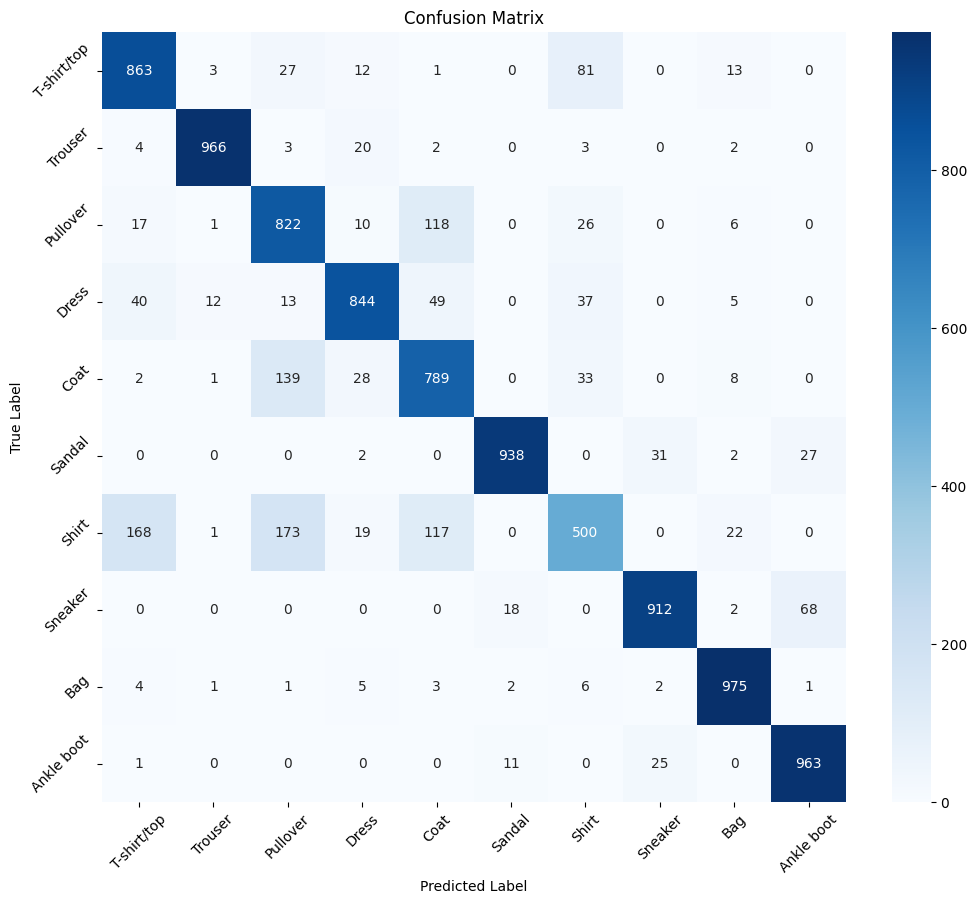

Class 0 is most often (81 times)confused with Class 6.
Class 1 is most often (20 times)confused with Class 3.
Class 2 is most often (118 times)confused with Class 4.
Class 3 is most often (49 times)confused with Class 4.
Class 4 is most often (139 times)confused with Class 2.
Class 5 is most often (31 times)confused with Class 7.
Class 6 is most often (173 times)confused with Class 2.
Class 7 is most often (68 times)confused with Class 9.
Class 8 is most often (6 times)confused with Class 6.
Class 9 is most often (25 times)confused with Class 7.


The two classes most confused with each other are: (2, 4)
The two classes most confused with each : 257 times.


In [ ]:
# Plot training metrics
plot_training_metrics(results3)

for res in results3:
    cm = plot_confusion_matrix(res['History'].model, x_test, y_test)
    most_confused_class(10, cm)

# Random search

In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import keras_tuner as kt
import numpy as np

class DataLoader:
    @staticmethod
    def split_validation(x_test, y_test, val_size=5000):
        """Split test data into validation and test sets"""
        x_val = x_test[:val_size]
        y_val = y_test[:val_size]
        x_test = x_test[val_size:]
        y_test = y_test[val_size:]

        return x_val, y_val, x_test, y_test

class ModelBuilder:
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build_model(self, hp):
        """Build model with hyperparameters"""
        model = models.Sequential([
            # Input layer
            layers.Input(shape=self.input_shape),

            # First hidden layer
            layers.Dense(
                units=hp.Int('units_1', min_value=32, max_value=256, step=32),
                activation='relu'
            ),
            layers.Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)),

            # Second hidden layer
            layers.Dense(
                units=hp.Int('units_2', min_value=32, max_value=256, step=32),
                activation='relu'
            ),
            layers.Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)),

            # Output layer
            layers.Dense(self.num_classes, activation='softmax')
        ])

        # Compile model
        model.compile(
            optimizer=optimizers.Adam(
                hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
            ),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

class HyperparameterTuner:
    def __init__(self, model_builder, project_name='model_tuning'):
        self.model_builder = model_builder
        self.project_name = project_name

    def create_tuner(self, max_trials=5):
        """Create random search tuner"""
        return kt.RandomSearch(
            self.model_builder.build_model,
            objective='val_accuracy',
            max_trials=max_trials,
            directory='random_search',
            project_name=self.project_name
        )

    @staticmethod
    def create_callbacks():
        """Create training callbacks"""
        return [
            tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=3,
                restore_best_weights=True
            )
        ]

    def find_best_model(self, x_train, y_train, x_val, y_val, max_trials=5):
        """Find best model using random search"""
        # Create tuner and callbacks
        tuner = self.create_tuner(max_trials)
        callbacks = self.create_callbacks()

        # Perform search
        print("Starting random search...")
        tuner.search(
            x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=10,
            batch_size=128,
            callbacks=callbacks
        )

        # Get best model and hyperparameters
        best_model = tuner.get_best_models(1)[0]
        best_hp = tuner.get_best_hyperparameters(1)[0]

        return best_model, best_hp

    @staticmethod
    def print_best_hyperparameters(best_hp):
        """Print best hyperparameters"""
        print("\nBest Hyperparameters:")
        print(f"Learning rate: {best_hp.get('learning_rate'):.6f}")
        print(f"Units in first layer: {best_hp.get('units_1')}")
        print(f"Units in second layer: {best_hp.get('units_2')}")
        print(f"Dropout rate 1: {best_hp.get('dropout_1'):.2f}")
        print(f"Dropout rate 2: {best_hp.get('dropout_2'):.2f}")

def main():
    # Load data
    print("Loading MNIST dataset...")
    data_loader = DataLoader()
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
    x_val, y_val, x_test, y_test = data_loader.split_validation(x_test, y_test)

    # Create model builder
    model_builder = ModelBuilder(input_shape=(784,), num_classes=10)

    # Create and run tuner
    tuner = HyperparameterTuner(model_builder, project_name='mnist_tuning')
    best_model, best_hp = tuner.find_best_model(
        x_train, y_train,
        x_val, y_val,
        max_trials=5
    )

    # Print results
    tuner.print_best_hyperparameters(best_hp)

    # Evaluate best model
    print("\nEvaluating best model on test set...")
    test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=0)
    print(f"Test accuracy: {test_accuracy:.4f}")

    # Save best model
    best_model.save('best_mnist_model.h5')
    print("\nBest model saved as 'best_mnist_model.h5'")

if __name__ == "__main__":
    main()

Trial 5 Complete [00h 00m 44s]
val_accuracy: 0.8726000189781189

Best val_accuracy So Far: 0.8726000189781189
Total elapsed time: 00h 02m 55s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Best Hyperparameters:
Learning rate: 0.000360
Units in first layer: 160
Units in second layer: 256
Dropout rate 1: 0.50
Dropout rate 2: 0.10

Evaluating best model on test set...


Test accuracy: 0.8714

Best model saved as 'best_mnist_model.h5'
